# Core Level Spectroscopy
## Taller 3 Punto 9

### (a)

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt

# se espera que el archivo esté en formato .txt (llamado "data.txt") y que esté en la carpeta "data"
data_path = os.path.join('data', 'data.txt')

In [42]:
# diccionario con metadatos
metadata = {}
energy = [] # (keV)
counts = []
background = []
fit = []

with open(data_path, 'r') as file:

    # se obtiene la metadata
    for _ in range(50):  # Solo las primeras 50 líneas que tienen la metadata
        line = file.readline()
        # se divide la línea por ':'
        key, value = [item.strip() for item in line.split(':', 1)]

        if key not in metadata:
            metadata[key] = value
        else: # por si hay dos valores con el mismo nombre
            key = key + '_1'
            metadata[key] = value

    # se ignora la línea de encabezados
    ignore_line = file.readline()  

    # hacer loop hasta llegar al final del archivo obteniendo los datos
    while True:
        line = file.readline()
        if not line:
            break
        # se divide la línea por espacios en blanco y se remueven las comas para convertir a float
        e, c, b, f = [float(item.replace(',','.')) for item in line.split()]
        energy.append(e)
        counts.append(c)
        background.append(b)
        fit.append(f)

# se convierten las listas a arrays de numpy
energy = np.array(energy)
counts = np.array(counts)
background = np.array(background)
fit = np.array(fit)

In [43]:
assert len(energy) == len(counts) == len(background) == len(fit) == (4147-52+1)
assert len(metadata) == 50

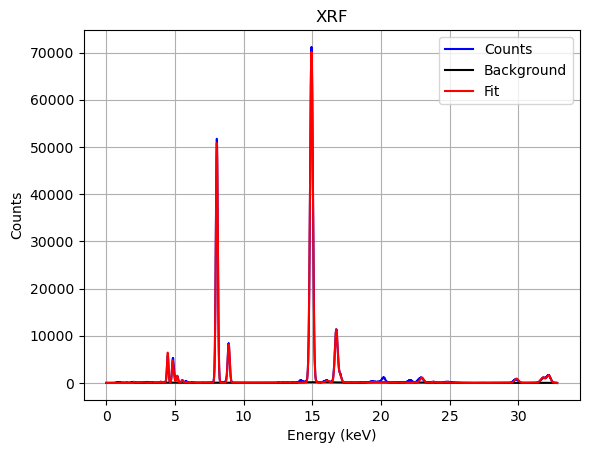

(0, 4096)

In [44]:
def get_energy_range(energies, energy_start, energy_end):
    # Primero, aseguramos que la lista esté ordenada
    energies.sort()
    
    # Encontramos el índice del primer valor mayor o igual a energy_start
    start_index = next((i for i, val in enumerate(energies) if val >= energy_start), None)
    
    # Encontramos el índice del último valor menor o igual a energy_end
    end_index = next((i for i, val in enumerate(reversed(energies)) if val <= energy_end), None)
    
    if start_index is None or end_index is None:
        return []  # Retorna una lista vacía si no se encuentra el rango
    
    # Ajustamos end_index al índice correcto en la lista original
    end_index = len(energies) - end_index - 1
    
    # Retornamos la sublista que incluye el rango deseado
    return start_index, end_index

# graficar datos
def plot_data(energy, counts=None, background=None, fit=None, 
              initial_energy = None, final_energy = None,
              initial_index = None, final_index = None):

    
    if initial_energy is not None and final_energy is not None:
        initial, final = get_energy_range(energy, initial_energy, final_energy)
        energy = energy[initial:final]
        plt.title('XRF from ' + str(initial_energy) + ' keV to ' + str(final_energy) + ' keV')
    elif initial_index is not None and final_index is not None:
        initial = initial_index
        final = final_index
        energy = energy[initial:final]
        plt.title('XRF')
    else:
        initial = 0
        final = len(energy)
        plt.title('XRF')
    
    if counts is not None:
        counts = counts[initial:final]
        plt.plot(energy, counts, label='Counts', color='b')
    if background is not None:
        background = background[initial:final]
        plt.plot(energy, background, label='Background', color='k')
    if fit is not None:
        fit = fit[initial:final]
        plt.plot(energy, fit, label='Fit', color = 'r')
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts')
    plt.grid()
    plt.legend()
    plt.show()

    return initial, final

plot_data(energy, counts, background, fit)

In [45]:
# maximo de background

max_background = max(background)
print(f'El máximo de background es {max_background}')

El máximo de background es 147.8232


In [46]:
from scipy.signal import find_peaks

# Para detectar los picos, se puede usar la función find_peaks de scipy.signal
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

# Encuentra los picos
peaks, properties = find_peaks(fit, height=3000)  # también se puede probar parámetros prominence y width

print("Cantidad de picos:", len(peaks))

print("Índices de los picos:", peaks)

peak_heights = fit[peaks]
print("Alturas de los picos:", peak_heights)


Cantidad de picos: 6
Índices de los picos: [ 559  605 1005 1113 1864 2090]
Alturas de los picos: [ 6422.529  4761.777 50833.13   8212.209 70152.51  11318.77 ]


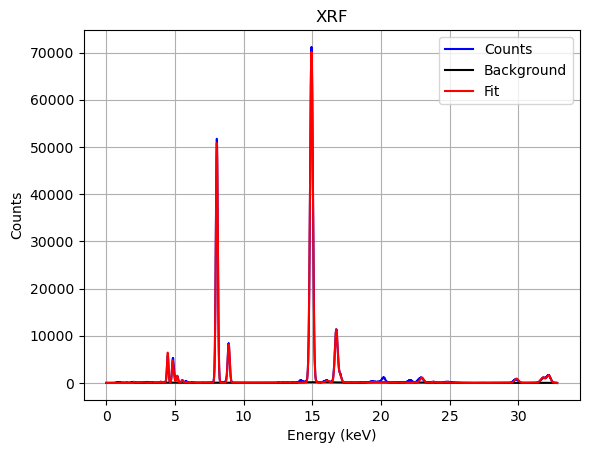

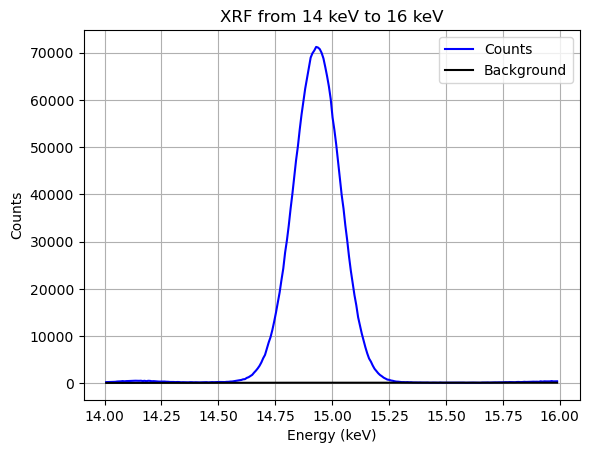

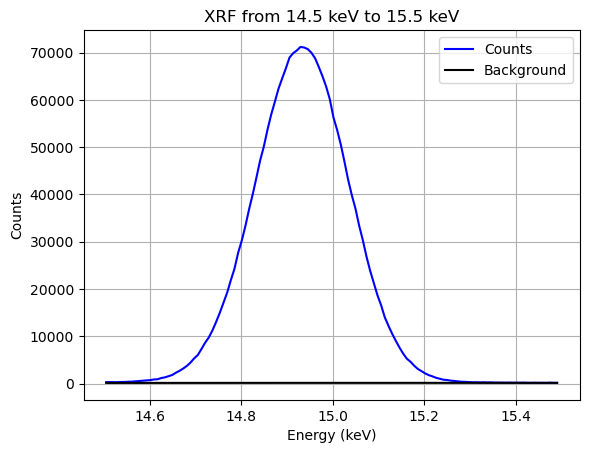

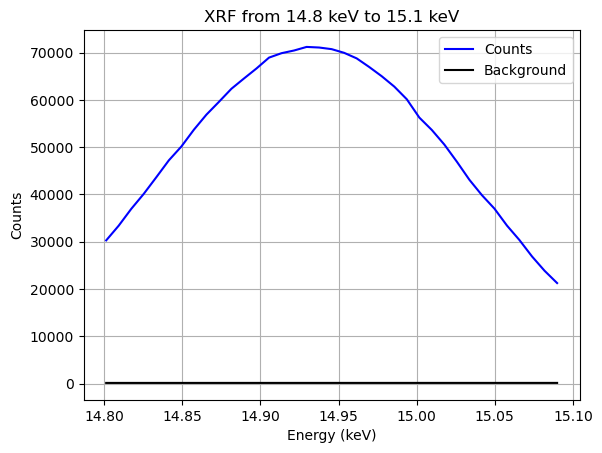

(1848, 1885)

In [47]:
plot_data(energy, counts, background, fit)
#plot_data(energy, counts, background, initial_energy=0, final_energy=4)
#plot_data(energy, counts, background, initial_energy=4, final_energy=7)
#plot_data(energy, counts, background, initial_energy=7, final_energy=10)
#plot_data(energy, counts, background, initial_energy=10, final_energy=14)
#plot_data(energy, counts, background, initial_energy=14, final_energy=15.5)
#plot_data(energy, counts, background, initial_energy=15.5, final_energy=18)
#plot_data(energy, counts, background, initial_energy=18, final_energy=25)
#plot_data(energy, counts, background, initial_energy=25, final_energy=40)

plot_data(energy, counts, background, initial_energy=14, final_energy=16)
plot_data(energy, counts, background, initial_energy=14.5, final_energy=15.5)

plot_data(energy, counts, background, initial_energy=14.8, final_energy=15.1)

In [48]:
from scipy.integrate import simps

# Area de toda la curva

area_total = simps(counts - background, energy)
print(f'El área total es {round(area_total,1)}')

El área total es 37400.8


In [49]:
from scipy.signal import find_peaks

# Para detectar los picos, se puede usar la función find_peaks de scipy.signal
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

# Encuentra los picos
peaks, properties = find_peaks(fit, height=2*max_background)  # también se puede probar parámetros prominence y width

print("Cantidad de picos:", len(peaks))

print("Índices de los picos:", peaks)

peak_heights = fit[peaks]
print("Alturas de los picos:", peak_heights)


Cantidad de picos: 13
Índices de los picos: [ 559  605  645  692 1005 1113 1864 2007 2090 2867 3726 3969 4017]
Alturas de los picos: [ 6422.529   4761.777   1529.799    600.5615 50833.13    8212.209
 70152.51     477.5586 11318.77    1154.005    908.585   1165.362
  1638.58  ]


In [ ]:
get_energy_range(energies, energy_start, energy_end)

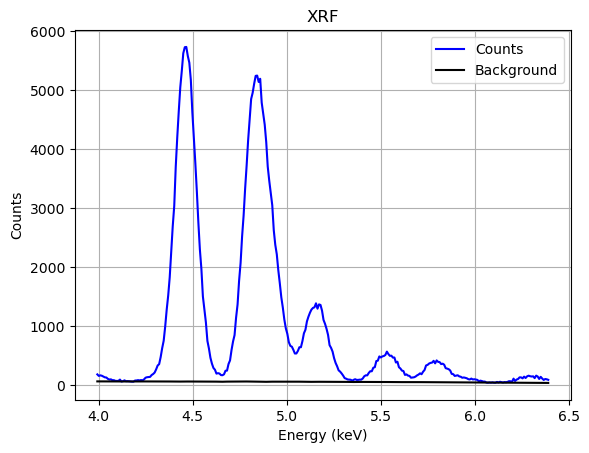

(500, 800)

In [50]:
plot_data(energy, counts, background, initial_index=500, final_index=800)